In [1]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("data/train_with_embeddings.csv")

In [3]:
# new features
train_data["url_count"] = train_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["text_len"] = train_data["text"].apply(lambda s: len(s))
train_data["hashtags_count"] = train_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["day"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
train_data["hour"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)

# indicators of keywords
train_data["Macron"] =  train_data["text"].apply(lambda s: ("macron" in s.lower().split()))
train_data["Zemmour"] =  train_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
train_data["Melenchon"] =  train_data["text"].apply(lambda s: ("melenchon" in s.replace("é","e").lower().split()))
train_data["rt"] =  train_data["text"].apply(lambda s: ("rt" in s.lower().split()))

In [4]:
display(train_data)

,Unnamed: 0,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,...,255,url_count,text_len,hashtags_count,day,hour,Macron,Zemmour,Melenchon,rt
0,0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,...,-1.968431,0.0,34,0.0,11,5,True,False,False,True
1,1,populaire,0,0,86,1016,284,[],[],0,...,0.400803,0.0,9,0.0,19,12,False,False,False,False
2,2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,...,-1.849327,0.0,19,0.0,15,18,False,False,False,False
3,3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,...,1.476303,1.0,123,0.0,14,11,False,False,False,False
4,4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,...,-1.747920,0.0,26,0.0,14,11,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,...,-2.060148,1.0,30,0.0,16,13,False,False,False,False
353965,353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,...,-0.245556,0.0,69,0.0,12,8,False,False,False,False
353966,353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,...,-3.738751,0.0,29,0.0,18,12,False,True,False,False
353967,353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,...,-0.351852,0.0,24,0.0,11,8,False,False,False,False


In [5]:
# select useful columns
train_data_filtered = train_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID"], axis=1)
# train_data_filtered = train_data.loc[:, ["retweets_count","favorites_count","followers_count","statuses_count","friends_count",
#                                  "hashtags_count","hour","verified","url_count","text_len","rt","Macron","Zemmour","Melenchon"]]


X_train, X_eval, y_train, y_eval = train_test_split(train_data_filtered.drop("retweets_count", axis=1),
                                                    train_data_filtered["retweets_count"],
                                                    random_state=42, test_size=0.1)

# Standardize the data
normal_columns = train_data_filtered.drop(["hour", "verified", "Macron", "Zemmour", "Melenchon", "url_count", "rt", "retweets_count"], axis=1).columns
mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

In [6]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [7]:
import tensorflow as tf

2022-12-04 12:40:58.264669: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 12:40:58.438917: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-04 12:40:59.190498: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-04 12:40:59.190562: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not l

In [8]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1746755842024071446
xla_global_id: -1
]


2022-12-04 12:40:59.789894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 12:41:00.717987: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-04 12:41:00.718021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (danilo-Nitro-AN515-58): /proc/driver/nvidia/version does not exist


In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1),
])

In [13]:
# import tensorflow_addons as tfa
# optimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
# model.compile(optimizer=optimizer, loss='mae')

In [14]:
model.compile(optimizer="adam", loss='mae')

In [15]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=150, batch_size=256,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)

Epoch 1/150
1245/1245 [==============================] - 8s 6ms/step - loss: 12.2257 - val_loss: 8.7094
Epoch 2/150
1245/1245 [==============================] - 7s 6ms/step - loss: 8.9769 - val_loss: 8.2442
Epoch 3/150
1245/1245 [==============================] - 8s 7ms/step - loss: 8.6293 - val_loss: 7.9329
Epoch 4/150
1245/1245 [==============================] - 7s 6ms/step - loss: 8.3532 - val_loss: 7.8255
Epoch 5/150
1245/1245 [==============================] - 8s 6ms/step - loss: 8.1335 - val_loss: 7.3569
Epoch 6/150
1245/1245 [==============================] - 8s 6ms/step - loss: 7.9006 - val_loss: 7.3225
Epoch 7/150
1245/1245 [==============================] - 8s 7ms/step - loss: 7.8346 - val_loss: 7.3058
Epoch 8/150
1245/1245 [==============================] - 8s 7ms/step - loss: 7.5945 - val_loss: 7.0938
Epoch 9/150
1245/1245 [==============================] - 7s 5ms/step - loss: 7.5368 - val_loss: 6.9384
Epoch 10/150
1245/1245 [==============================] - 7s 6ms/step - 

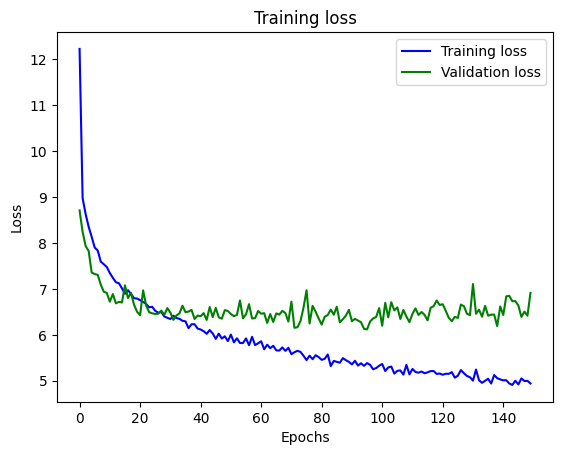

: 

In [16]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_eval.values.astype(np.float32),  y_eval.values.astype(np.float32), verbose=2)

1107/1107 - 0s - loss: 6.6812 - 406ms/epoch - 366us/step


6.68115234375

In [ ]:
pred = model.predict(X_train.values.astype(np.float32))
print(pred)

9956/9956 [==============================] - 5s 506us/step
[[-2.1648650e-04]
 [ 1.4049070e+00]
 [-2.1648650e-04]
 ...
 [ 1.5206449e+00]
 [-2.1648650e-04]
 [ 1.6713862e+00]]


In [ ]:
# plt.scatter(X_train["favorites_count"], model.predict(X_train))
# plt.scatter(X_train["favorites_count"], y_train.values.astype(np.float32))

In [ ]:
# evaluation

eval_data = pd.read_csv("data/evaluation_with_embeddings.csv")
tweets = eval_data["TweetID"]

In [ ]:
eval_data["url_count"] = eval_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["text_len"] = eval_data["text"].apply(lambda s: len(s))
eval_data["hashtags_count"] = eval_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["day"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
eval_data["hour"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)
eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.lower().split()))
eval_data["rt"] =  eval_data["text"].apply(lambda s: ("rt" in s.lower().split()))

# print("sentiment analysis...")
# eval_data["compound"] =  eval_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

eval_data = eval_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID"], axis=1)

# normalize
eval_data.loc[:, normal_columns] = (eval_data.loc[:, normal_columns] - mu) / sigma

print(eval_data)

pred = model.predict(eval_data.values.astype(np.float32))

print(pred)

# output normalization
for i,p in enumerate(pred):
    if p<0: pred[i] = 0

        Unnamed: 0  favorites_count  followers_count  statuses_count  \
0        -1.731691        -0.055089        -0.077561       -0.384487   
1        -1.731681        -0.055089        -0.076250       -0.130940   
2        -1.731672        -0.047990        -0.073569       -0.308274   
3        -1.731662        -0.052722        -0.071378       -0.197070   
4        -1.731652        -0.055089        -0.076932       -0.241396   
...            ...              ...              ...             ...   
117985   -0.577125        -0.055089        -0.077871       -0.421834   
117986   -0.577115        -0.055089        -0.075036       -0.076371   
117987   -0.577105        -0.040891        -0.074347       -0.403582   
117988   -0.577095        -0.055089        -0.077867       -0.423504   
117989   -0.577086        -0.055089        -0.075760       -0.373401   

        friends_count  verified         0         1         2         3  ...  \
0           -0.451430         0  0.039931  1.043676 -0.

In [ ]:
with open("data/predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["TweetID", "retweets_count"])
    for index, prediction in enumerate(pred):
        writer.writerow([str(tweets[index]) , str(int(prediction))])